In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)

mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
ct_df = pd.read_csv(clinical_trial_data_to_load)

ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(ct_df, mouse_df, how="inner", on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin



## Tumor Response to Treatment

In [4]:
combined_df.groupby("Drug")["Timepoint"].count()
tumor_response = combined_df.groupby(["Drug", "Timepoint"])
tumor_df = tumor_response["Tumor Volume (mm3)"].mean().to_frame()
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
tumor_response_error = combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tre_df = tumor_response_error.to_frame()
tre_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_plot_pre = tumor_df.unstack(0)
tumor_plot_df = tumor_plot_pre["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_plot_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


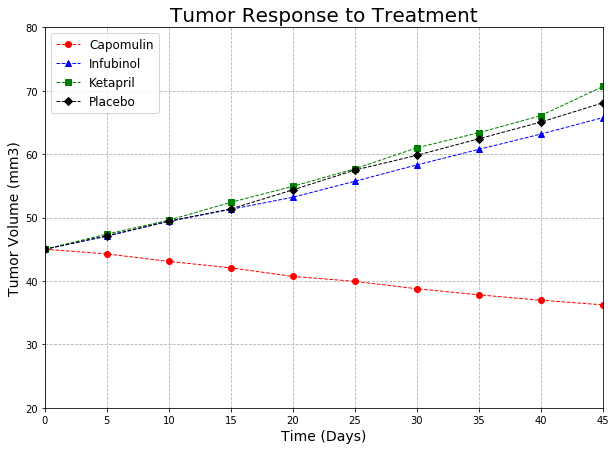

In [7]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = tre_df["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], marker="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = tre_df["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], marker="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = tre_df["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], marker="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = tre_df["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], marker="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure

plt.savefig('tumor_response.png')

# Show the Figure

plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_df.groupby("Drug")["Timepoint"].count()
meta_response = combined_df.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
meta_df = meta_response["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
meta_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_response_error = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
mre_df = meta_response_error.to_frame()
# Convert to DataFrame
mre_df = meta_response_error.to_frame()

# Preview DataFrame
mre_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
meta_plot_pre = mre_df.unstack(0)
meta_plot_df = meta_plot_pre["Metastatic Sites"]
# Preview that Reformatting worked
meta_plot_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


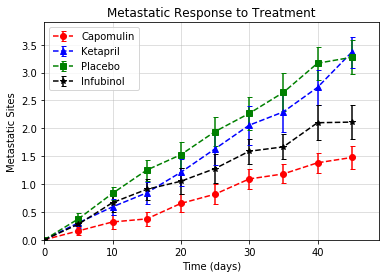

In [11]:
# This scatter plot shows how the tumor volume changes over time for each treatment.
plt.errorbar(np.arange(0, 50, 5), meta_df.loc["Capomulin", "Metastatic Sites"],
             yerr = mre_df.loc["Capomulin", "Metastatic Sites"], marker= 'o', color='r', capsize = 2.5, linestyle = '--', label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), meta_df.loc["Ketapril", "Metastatic Sites"],
             yerr = mre_df.loc["Ketapril", "Metastatic Sites"], marker= '^', color='b', capsize = 2.5, linestyle = '--', label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), meta_df.loc["Placebo", "Metastatic Sites"],
             yerr = mre_df.loc["Placebo", "Metastatic Sites"], marker ='s', color='g', capsize = 2.5, linestyle = '--', label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), meta_df.loc["Infubinol", "Metastatic Sites"],
             yerr = mre_df.loc["Infubinol", "Metastatic Sites"], marker= '*', color='k', linestyle = '--', capsize = 2.5, label = "Infubinol")

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Add labels
plt.title('Metastatic Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

# Add x limits and y limits
plt.xlim(0,49)
plt.ylim(0,3.9)
# Save the Figure
plt.savefig('meta_response.png')
# Show the Figure
plt.show()

## Survival Rates

In [23]:
# Subset the data to be grouped by Drug and Timepoint and take a count of Mouse ID to find overal survival
grouped_df = combined_df.groupby(["Drug", "Timepoint"])

subset_df = grouped_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})

subset_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [24]:
# Minor Data Munging to Re-Format the Data Frames
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
# Preview the Data Frame
mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


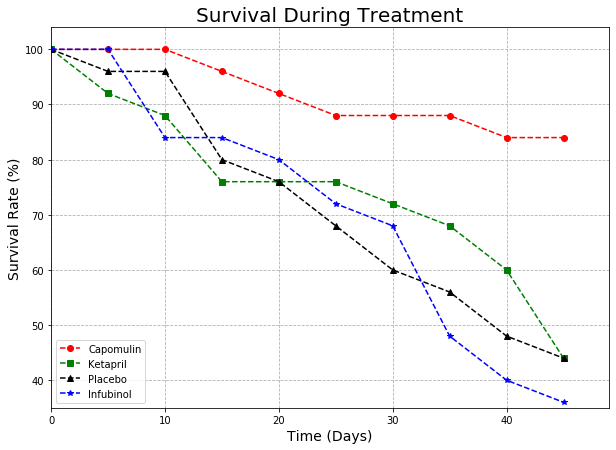

In [25]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,7))

plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Capomulin", "Mouse Count"]/25,
         marker = 'o', color='r', label= "Capomulin", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Ketapril", "Mouse Count"]/25,
         marker = 's', color='g', label= "Ketapril", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Placebo", "Mouse Count"]/25,
         marker = '^', color='k', label= "Placebo", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Infubinol", "Mouse Count"]/25,
         marker = '*', color='b', label= "Infubinol", linestyle ='--')

plt.ylim(35, 104)
plt.xlim(0, 49)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend(loc="lower left")

# Save the Figure
plt.savefig('survival_response.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [26]:
capchange = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placchange = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propchange = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramichange = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100


drug_change_df = pd.DataFrame({"Drug": ["Capomulin","Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
                               "Percent Change": [capchange, ceftchange, infuchange, ketachange, naftchange, placchange, propchange, ramichange, stelchange, zonichange]
                              })
drug_change_df 


,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


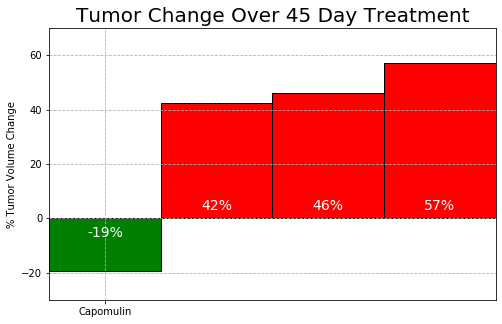

In [27]:
# Store all Relevant Percent Changes into a Tuple
plt.figure(figsize=(8,5))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Save the Figure
plt.savefig('summary_bar.png')

# Show the Figure
plt.show()